In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV

In [3]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

In [4]:
from xgboost import XGBClassifier, XGBRegressor

In [5]:
df = pd.read_csv('life_expectancy.csv')
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,...,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


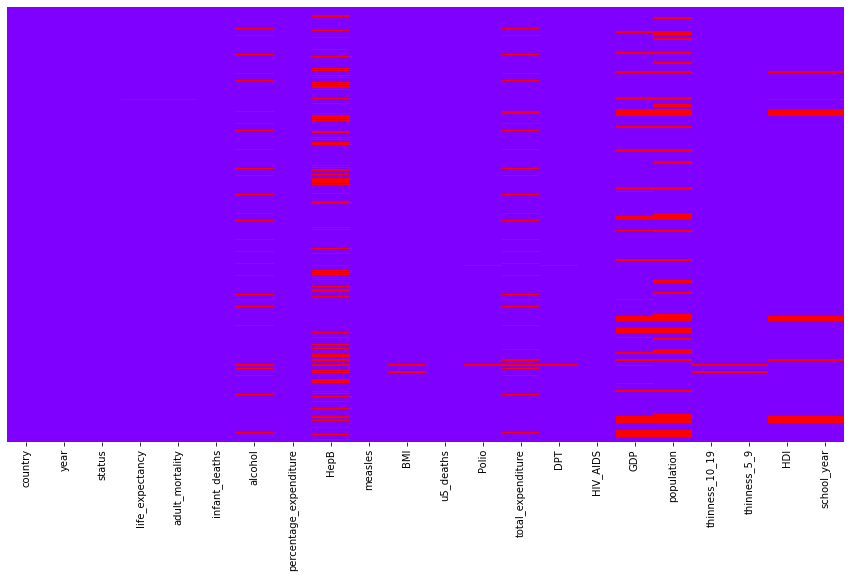

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isna(), cmap='rainbow', cbar=False, yticklabels=False)
plt.show()

In [7]:
df.isna().sum()

country                     0
year                        0
status                      0
life_expectancy            10
adult_mortality            10
infant_deaths               0
alcohol                   194
percentage_expenditure      0
HepB                      553
measles                     0
BMI                        34
u5_deaths                   0
Polio                      19
total_expenditure         226
DPT                        19
HIV_AIDS                    0
GDP                       448
population                652
thinness_10_19             34
thinness_5_9               34
HDI                       167
school_year               163
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

country                   0
year                      0
status                    0
life_expectancy           0
adult_mortality           0
infant_deaths             0
alcohol                   0
percentage_expenditure    0
HepB                      0
measles                   0
BMI                       0
u5_deaths                 0
Polio                     0
total_expenditure         0
DPT                       0
HIV_AIDS                  0
GDP                       0
population                0
thinness_10_19            0
thinness_5_9              0
HDI                       0
school_year               0
dtype: int64

In [10]:
df['country'].nunique()

133

In [11]:
df['status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [12]:
df['status'] = df['status'].map({'Developing' : 0, 'Developed' : 1})

In [13]:
df = pd.get_dummies(df, columns=['country'])

In [14]:
### Train Test Split

In [15]:
df.head()

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,...,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Zambia,country_Zimbabwe
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = df.drop(columns='life_expectancy')
y = df['life_expectancy']

In [17]:
kf = KFold(n_splits=4)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state= 69)

In [19]:
## Base Model

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
## XGB

In [22]:
base_XGB = XGBRegressor()

In [23]:
base_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [24]:
y_baseXGB = base_XGB.predict(X_test)

In [25]:
r2_score(y_test, y_baseXGB)

0.9613435508239748

In [26]:
base_RF = RandomForestRegressor()

In [27]:
base_RF.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
y_baseRF = base_RF.predict(X_test)

In [29]:
r2_score(y_test, y_baseRF)

0.964186829361659

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
Lin = LinearRegression()

In [32]:
Lin.fit(X_train, y_train)

LinearRegression()

In [33]:
y_lin = Lin.predict(X_test)

In [34]:
r2_score(y_test, y_lin)

0.962763649173143

In [35]:
param_XGB = {
    'n_estimators' : np.arange(100, 401, 100),
    'max_depth' : np.arange(1, 6),
    'learning_rate' : np.logspace(-3, 0, 4),
    'gamma' : np.logspace(-3, 2, 6),
    'colsample_bytree' : [0.3, 0.5, 0.7, 0.8],
    'subsample' : [0.3, 0.5, 0.7, 0.8],
    'reg_alpha' : np.logspace(-3, 3, 7),
    'reg_lambda' : np.logspace(-3, 3, 7)
}

In [36]:
model_XGB = XGBRegressor()

In [37]:
RS_XGB = RandomizedSearchCV(model_XGB, param_XGB, n_iter = 25, scoring='r2', verbose=1, n_jobs=-1, cv = kf, random_state=69)

In [38]:
RS_XGB.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_co...
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'learning_rate': array([0.001, 0.01 , 0.1  , 

In [39]:
XGB_Tuned = RS_XGB.best_estimator_

In [40]:
y_xgb = XGB_Tuned.predict(X_test)

In [41]:
r2_score(y_test, y_xgb)

0.9631142999489395

In [42]:
GS_XGB = GridSearchCV(model_XGB, param_XGB, cv = kf, verbose=1, n_jobs=-1)